# MMS neutral sheet models

This notebook demonstrates how to load MMS position data and retrieve the distance from the S/C to the neutral sheet

In [ ]:
!pip install pyspedas

In [13]:
import pyspedas
from pytplot import tplot, get_data, store_data, options

Load the spacecraft position data

In [4]:
pyspedas.mms.mec(probe=1, trange=['2015-10-16', '2015-10-17'])

SDC username (blank for public access): 


28-Nov-22 17:43:10: Downloading mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms1/mec/srvy/l2/epht89q/2015/10
28-Nov-22 17:43:11: Loaded variables:
28-Nov-22 17:43:11: mms1_mec_dipole_tilt
28-Nov-22 17:43:11: mms1_mec_gmst
28-Nov-22 17:43:11: mms1_mec_mlat
28-Nov-22 17:43:11: mms1_mec_mlt
28-Nov-22 17:43:11: mms1_mec_l_dipole
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_bcs
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_dbcs
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_dmpa
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_smpa
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_dsl
28-Nov-22 17:43:11: mms1_mec_quat_eci_to_ssl
28-Nov-22 17:43:11: mms1_mec_L_vec
28-Nov-22 17:43:11: mms1_mec_Z_vec
28-Nov-22 17:43:11: mms1_mec_P_vec
28-Nov-22 17:43:11: mms1_mec_L_phase
28-Nov-22 17:43:11: mms1_mec_Z_phase
28-Nov-22 17:43:11: mms1_mec_P_phase
28-Nov-22 17:43:11: mms1_mec_kp
28-Nov-22 17:43:11: mms1_mec_dst
28-Nov-22 17:43:11: mms1_mec_earth_eclipse_flag
28-Nov-22 17:43:11: mms1_mec_moon_eclipse_flag
28-Nov-22 17:

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Convert from km to Re

In [5]:
from pyspedas import tkm2re

tkm2re('mms1_mec_r_gsm')

['mms1_mec_r_gsm_re']

Get the data/times as numpy arrays

In [8]:
pos_data = get_data('mms1_mec_r_gsm_re')

Calculate the distance to the neutral sheet using the Lopez model

In [9]:
from pyspedas.analysis.neutral_sheet import neutral_sheet

In [11]:
z2NS = neutral_sheet(pos_data.times, pos_data.y, model='lopez', sc2NS=True)

Save the distance to the neutral sheet

In [14]:
store_data('z_distance_to_neutral_sheet', data={'x': pos_data.times, 'y': z2NS})
options('z_distance_to_neutral_sheet', 'ysubtitle', '[Re]')

Plot it

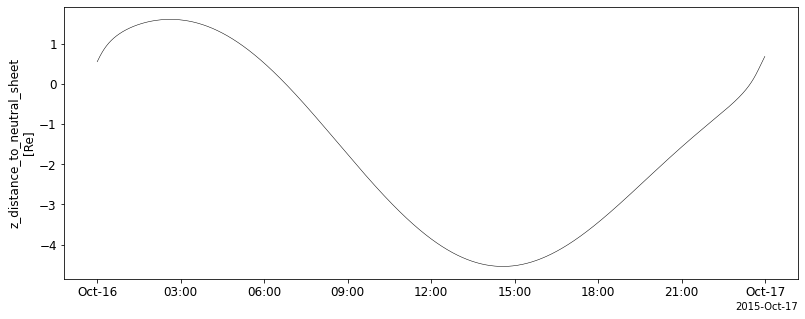

In [15]:
tplot('z_distance_to_neutral_sheet')